In [25]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(20,12)})
import matplotlib.pyplot as plt
import numpy as np

In [45]:
df = pd.read_csv("headlines_cleaned.csv")
df.index = pd.to_datetime(df['index'])
df.index.name = 'Date'
df.drop(columns = ['Unnamed: 0', 'index'],inplace = True)
df = df.loc[~df.index.year.isin([2020, 2006])]   # unten wird jährlich aggregiert, da für 2006 und 2020 kein komplettes Jahr vorliegt filtere ich sie raus
df

,text,link1,link2,link3,link4,link5
Date,,,,,,
2007-01-01 22:52:00,BILD-Kommentar,news,2007,kommentar-1201380.bild.html,NaN,NaN
2007-01-01 22:48:00,Hoffnung! Schmitt fliegt auf Platz 8,sport,2007,hg-02-schmitt-markus-1202326.bild.html,NaN,NaN
2007-01-01 22:47:00,Henker filmten Saddams Sterben: Neues Schock-...,news,2007,saddam-schock-video-1200206.bild.html,NaN,NaN
2007-01-01 22:46:00,Penélope Cruz im Bikini ins neue Jahr,leute,2007,klatsch-1200422.bild.html,NaN,NaN
2007-01-01 22:45:00,Die Pop-Sensation: No Angels zurück auf der B...,leute,2007,no-angels-comeback-1199848.bild.html,NaN,NaN
...,...,...,...,...,...,...
2019-12-31 06:05:00,Meteorologen ziehen Bilanz: 2019 ist das drit...,news,wetter,wetter,meteorologen-ziehen-bilanz-2019-ist-das-drittw...,NaN
2019-12-31 03:00:00,Leipzig: Die Polizei jagt diesen Handy-Hasser,regional,mecklenburg-vorpommern,mecklenburg-vorpommern-news,leipzig-die-polizei-jagt-diesen-handy-hasser-6...,NaN
2019-12-31 01:20:00,Silvester 2019: Tausende feiern einen Tag zu ...,ratgeber,2019,ratgeber,silvester-2019-tausende-feiern-einen-tag-zu-fr...,NaN


In [108]:
spd = df.loc[df.text.str.contains('SPD')].resample('y').size()
csu = df.loc[df.text.str.contains('CSU')].resample('y').size()
fdp = df.loc[df.text.str.contains('FDP')].resample('y').size()
afd = df.loc[df.text.str.contains('AfD')].resample('y').size()
linke = df.loc[df.text.str.contains('Linke')].resample('y').size()
cdu = df.loc[df.text.str.contains("CDU")].resample('y').size()
gruene = df.loc[df.text.str.contains("Grüne")].resample('y').size()
npd = df.loc[df.text.str.contains("NPD")].resample('y').size()

In [109]:
total_df = pd.DataFrame([spd, csu, fdp, afd, linke, cdu, gruene, npd], index = ['spd', 'csu', 'fdp', 'afd', 'linke', 'cdu', 'gruene', 'npd']).T
total_df.fillna(0, inplace = True) # für afd für die Jahre 2008 - 2012
total_df = total_df.astype(int)
total_df['total'] = total_df.sum(axis = 1)

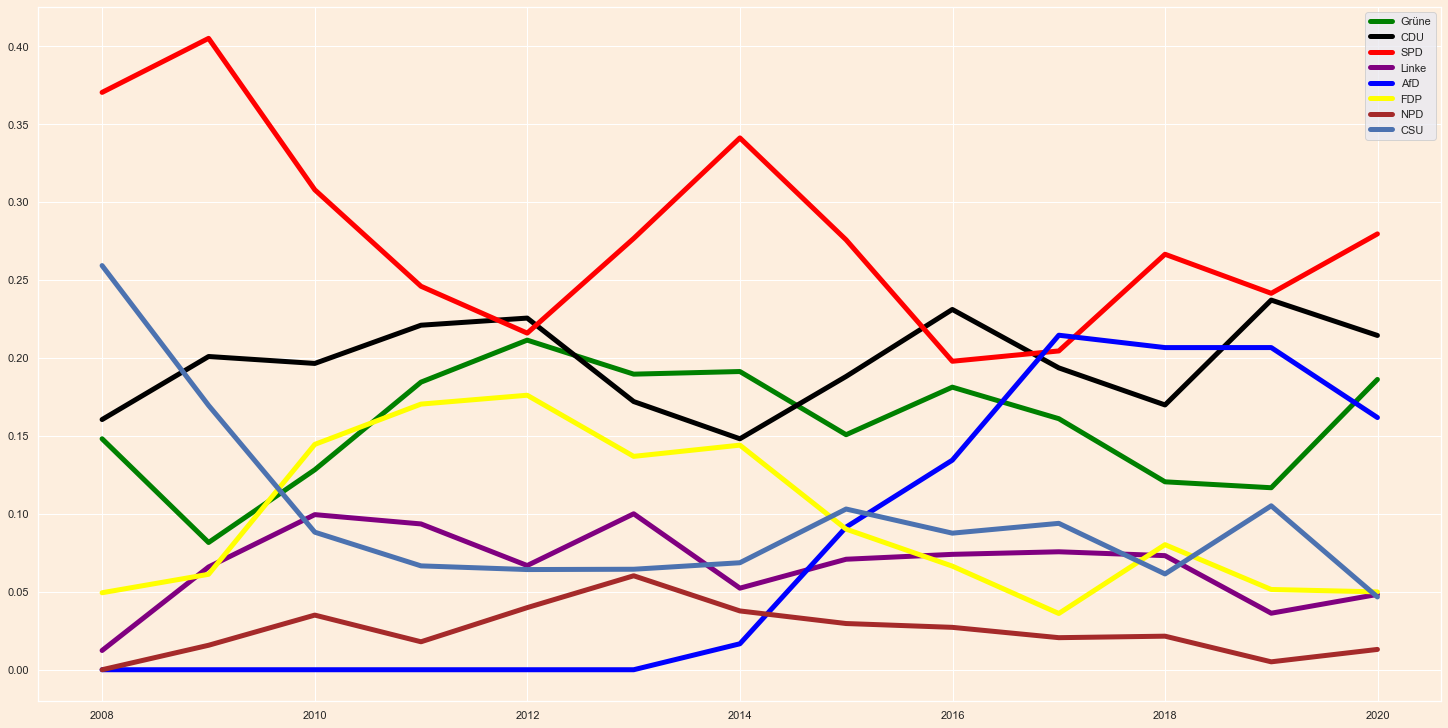

In [111]:
fig_kws = { 'facecolor': 'white',
						'figsize':(20, 10),
						'edgecolor':'k',
						'linewidth':0,
						'frameon': True,
						'tight_layout': False,
						'constrained_layout': True,
			}

fig, axs = plt.subplots(nrows =1, ncols= 1, sharey=True, sharex = True, **fig_kws)
fig.set_facecolor(tuple(np.array([253, 238, 222]) / 255))
axs.set_facecolor(tuple(np.array([253, 238, 222]) / 255))



sns.lineplot(data = total_df.gruene / total_df.total, ax = axs, label = "Grüne", linewidth=5, color = 'green')
sns.lineplot(data = total_df.cdu / total_df.total, ax = axs, label = "CDU", linewidth=5, color = 'black')
sns.lineplot(data = total_df.spd / total_df.total, ax = axs, label = 'SPD', linewidth=5, color = 'red')
sns.lineplot(data = total_df.linke / total_df.total, ax = axs, label = 'Linke', linewidth=5, color = 'purple')
sns.lineplot(data = total_df.afd / total_df.total, ax = axs, label = 'AfD', linewidth=5, color = 'blue')
sns.lineplot(data = total_df.fdp / total_df.total, ax = axs, label = 'FDP', linewidth=5, color = 'yellow')
sns.lineplot(data = total_df.npd / total_df.total, ax = axs, label = 'NPD', linewidth=5, color = 'brown')
sns.lineplot(data = total_df.csu / total_df.total, ax = axs, label = 'CSU', linewidth=5)